In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import re
import spacy
import seaborn as sns
from collections import Counter

2025-03-08 18:00:59.515660: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('/Users/apple/Downloads/My Files/My File/Twitter Data/tweets_data.csv')

In [3]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [4]:
import re
import spacy
import pandas as pd


nlp = spacy.load("en_core_web_sm")

common_stopwords = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself",
    "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which",
    "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be",
    "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an",
    "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by",
    "for", "with", "about", "against", "between", "into", "through", "during", "before",
    "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over",
    "under", "again", "further", "then", "once", "here", "there", "when", "where", "why",
    "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such",
    "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t",
    "can", "will", "just", "don", "should", "now"
])

# Function to remove emojis
def remove_emojis(text):
    return text.encode('ascii', 'ignore').decode('ascii')

# Function to clean text
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
        text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
        text = remove_emojis(text)  # Remove emojis
        text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove special characters
        text = ' '.join([word.lower() for word in text.split() if word.lower() not in common_stopwords])  # Remove stopwords and lowercase
        return text
    return ""


In [5]:
df['cleaned_text'] = df['text'].apply(clean_text)

# Use spaCy nlp.pipe() for faster processing
lemmatized_texts = []
for doc in nlp.pipe(df['cleaned_text'], batch_size=50):  # Process in batches
    lemmatized_texts.append(" ".join([token.lemma_ for token in doc if token.is_alpha]))

# Store results
df['lemmatized_text'] = lemmatized_texts

# Save the processed dataset
df.to_csv("processed_tweets.csv", index=False)

print(df[['text', 'cleaned_text', 'lemmatized_text']].head())


                                                text  \
0  If I smelled the scent of hand sanitizers toda...   
1  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  @brookbanktv The one gift #COVID19 has give me...   
4  25 July : Media Bulletin on Novel #CoronaVirus...   

                                        cleaned_text  \
0  smelled scent hand sanitizers today someone pa...   
1        hey wouldnt made sense players pay respects   
2      trump never claimed covid19 hoax claim effort   
3  one gift covid19 give appreciation simple thin...   
4  25 july media bulletin novel coronavirusupdate...   

                                     lemmatized_text  
0  smell scent hand sanitizer today someone past ...  
1        hey would not make sense player pay respect  
2                trump never claim hoax claim effort  
3  one gift give appreciation simple thing always...  
4       july medium bulletin novel coronavirusupdat

In [6]:
df_pr = pd.read_csv('/Users/apple/Downloads/My Files/My File/Twitter Data/processed_tweets.csv')

/var/folders/0q/0xxb80s51vg76dkx_k08zm2c0000gn/T/ipykernel_5975/660867968.py:1: DtypeWarning: Columns (4,5,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pr = pd.read_csv('/Users/apple/Downloads/My Files/My File/Twitter Data/processed_tweets.csv')


In [7]:
df_pr.head(20)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,cleaned_text,lemmatized_text
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775.0,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,smelled scent hand sanitizers today someone pa...,smell scent hand sanitizer today someone past ...
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24.0,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,hey wouldnt made sense players pay respects,hey would not make sense player pay respect
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254.0,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,trump never claimed covid19 hoax claim effort,trump never claim hoax claim effort
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488.0,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,one gift covid19 give appreciation simple thin...,one gift give appreciation simple thing always...
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101.0,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,25 july media bulletin novel coronavirusupdate...,july medium bulletin novel coronavirusupdate
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287.0,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False,coronavirus covid19 deaths continue rise almos...,coronavirus death continue rise almost bad eve...
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801.0,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False,covid19 change work general recruiting specifi...,change work general recruit specifically via r...
7,Derbyshire LPC,NaN,NaN,2012-02-03 18:08:10,608,355,95.0,False,2020-07-25 12:27:00,You now have to wear face coverings when out s...,NaN,TweetDeck,False,wear face coverings shopping includes visit lo...,wear face covering shopping include visit loca...
8,Prathamesh Bendre,NaN,"A poet, reiki practitioner and a student of law.",2015-04-25 08:15:41,25,29,18.0,False,2020-07-25 12:26:59,Praying for good health and recovery of @Chouh...,"['covid19', 'covidPositive']",Twitter for Android,False,praying good health recovery covid19 covidposi...,pray good health recovery covidpositive
9,Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺,👇🏻location at link below👇🏻,"Just as the body is one & has many members, & ...",2014-08-17 04:53:22,55201,34239,29802.0,False,2020-07-25 12:26:54,POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...,"['HurricaneHanna', 'COVID19']",Twitter for iPhone,False,pope god prophet sadhu sundar selvaraj watch h...,pope god prophet sadhu sundar selvaraj watch h...


In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Ensure all values in 'cleaned_text' are strings
df_pr['cleaned_text'] = df_pr['cleaned_text'].astype(str)

# Apply sentiment analysis
df_pr['sentiment'] = df_pr['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Label the sentiment
df_pr['sentiment_label'] = df_pr['sentiment'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))

# Display the DataFrame
print(df_pr.head())

         user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description         user_created  \
0  wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1  Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4  🖊️Official Twitter handle of Department of Inf...  2017-02-12 06:45:15   

  user_followers user_friends  user_favourites user_verified  \
0            624          950          18775.0         False   
1           2253         1677             24.0          True   
2           9275         9525           7254.0         False   
3            197

In [9]:
df_pr.head(20)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,cleaned_text,lemmatized_text,sentiment,sentiment_label
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775.0,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,smelled scent hand sanitizers today someone pa...,smell scent hand sanitizer today someone past ...,0.4939,positive
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24.0,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,hey wouldnt made sense players pay respects,hey would not make sense player pay respect,0.2263,positive
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254.0,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,trump never claimed covid19 hoax claim effort,trump never claim hoax claim effort,0.2057,positive
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488.0,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,one gift covid19 give appreciation simple thin...,one gift give appreciation simple thing always...,0.7351,positive
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101.0,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,25 july media bulletin novel coronavirusupdate...,july medium bulletin novel coronavirusupdate,0.3182,positive
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287.0,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False,coronavirus covid19 deaths continue rise almos...,coronavirus death continue rise almost bad eve...,-0.4417,negative
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801.0,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False,covid19 change work general recruiting specifi...,change work general recruit specifically via r...,0.0000,neutral
7,Derbyshire LPC,NaN,NaN,2012-02-03 18:08:10,608,355,95.0,False,2020-07-25 12:27:00,You now have to wear face coverings when out s...,NaN,TweetDeck,False,wear face coverings shopping includes visit lo...,wear face covering shopping include visit loca...,0.0000,neutral
8,Prathamesh Bendre,NaN,"A poet, reiki practitioner and a student of law.",2015-04-25 08:15:41,25,29,18.0,False,2020-07-25 12:26:59,Praying for good health and recovery of @Chouh...,"['covid19', 'covidPositive']",Twitter for Android,False,praying good health recovery covid19 covidposi...,pray good health recovery covidpositive,0.6597,positive
9,Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺,👇🏻location at link below👇🏻,"Just as the body is one & has many members, & ...",2014-08-17 04:53:22,55201,34239,29802.0,False,2020-07-25 12:26:54,POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...,"['HurricaneHanna', 'COVID19']",Twitter for iPhone,False,pope god prophet sadhu sundar selvaraj watch h...,pope god prophet sadhu sundar selvaraj watch h...,0.2732,positive


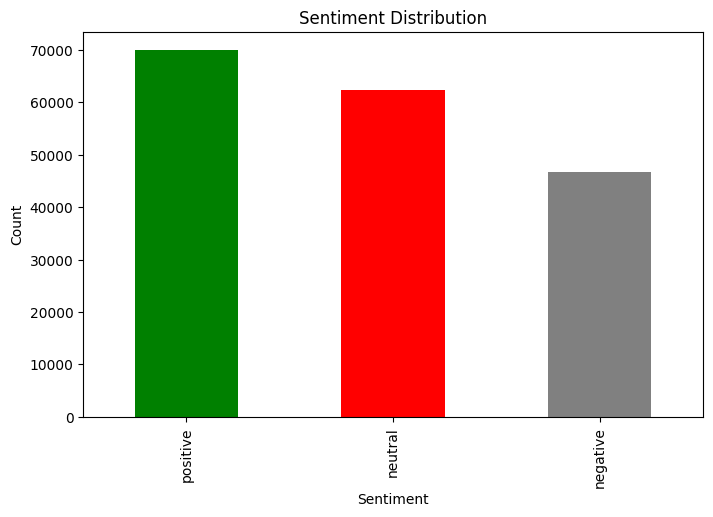

In [10]:
plt.figure(figsize=(8, 5))
df_pr['sentiment_label'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [11]:
df_pr.dropna(inplace=True)

In [12]:
df_pr.head(20)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,cleaned_text,lemmatized_text,sentiment,sentiment_label
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254.0,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,trump never claimed covid19 hoax claim effort,trump never claim hoax claim effort,0.2057,positive
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488.0,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,one gift covid19 give appreciation simple thin...,one gift give appreciation simple thing always...,0.7351,positive
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101.0,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,25 july media bulletin novel coronavirusupdate...,july medium bulletin novel coronavirusupdate,0.3182,positive
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287.0,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False,coronavirus covid19 deaths continue rise almos...,coronavirus death continue rise almost bad eve...,-0.4417,negative
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801.0,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False,covid19 change work general recruiting specifi...,change work general recruit specifically via r...,0.0000,neutral
9,Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺,👇🏻location at link below👇🏻,"Just as the body is one & has many members, & ...",2014-08-17 04:53:22,55201,34239,29802.0,False,2020-07-25 12:26:54,POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...,"['HurricaneHanna', 'COVID19']",Twitter for iPhone,False,pope god prophet sadhu sundar selvaraj watch h...,pope god prophet sadhu sundar selvaraj watch h...,0.2732,positive
11,Creativegms,"Dhaka,Bangladesh","I'm Motalib Mia, Logo -Logo Designer - Brandin...",2020-01-12 09:03:01,241,1694,8443.0,False,2020-07-25 12:26:50,Order here: https://t.co/4NUrGX6EmA\n\n#logo #...,"['logo', 'graphicdesigner', 'logodesign', 'log...",Twitter Web App,False,order logo graphicdesigner logodesign logodesi...,order logo graphicdesigner logodesign logodesi...,0.0000,neutral
12,SEXXYLYPPS,Hotel living - various cities! Who needs a ho...,"My ink ""My Way...No Regrets""\nAlways Make Happ...",2010-03-25 21:16:20,0,8,32.0,False,2020-07-25 12:26:47,👋🏻@PattyHajdu @NavdeepSBains — no one will be ...,['COVID19'],Twitter Web App,False,one safe covid19 everyone safe commit ensure,one safe everyone safe commit ensure,0.8625,positive
13,Africa Youth Advisory Board on DRR,Africa,Official account of the Africa Youth Advisory ...,2019-05-13 06:27:47,830,254,3692.0,False,2020-07-25 12:26:47,Let's all protect ourselves from #COVID19.\nIt...,['COVID19'],Twitter Web App,False,lets protect covid19 real numbers climbing fas...,let protect real number climb fast continent l...,0.3818,positive
15,Dimapur 24/7.,"Nagaland, India",strive to promote Truth with Integrity.\nhttps...,2019-11-11 12:02:27,274,32,378.0,False,2020-07-25 12:26:45,Nagaland police on Covid-19 Awareness at City ...,"['Covid19', 'keepsocialdistance']",Twitter for Android,False,nagaland police covid19 awareness city tower j...,nagaland police awareness city tower junction ...,0.0000,neutral


In [13]:
print(df_pr['hashtags'].head(10))  

2                                           ['COVID19']
3                                           ['COVID19']
4                     ['CoronaVirusUpdates', 'COVID19']
5                            ['coronavirus', 'covid19']
6                             ['COVID19', 'Recruiting']
9                         ['HurricaneHanna', 'COVID19']
11    ['logo', 'graphicdesigner', 'logodesign', 'log...
12                                          ['COVID19']
13                                          ['COVID19']
15                    ['Covid19', 'keepsocialdistance']
Name: hashtags, dtype: object


In [14]:
# Extract unique hashtags from the dataset
df_pr['hashtags'] = df_pr['hashtags'].astype(str)  # Ensure the column is treated as a string
unique_hashtags = set()

for tags in df_pr['hashtags']:
    if tags != 'nan':  # Ignore NaN values
        tags_list = eval(tags) if isinstance(tags, str) and tags.startswith("[") else [tags]
        unique_hashtags.update(tags_list)



In [15]:
unique_hashtags

{'BabyTimebomb',
 'TexasCovid19',
 'torontofood',
 'energytech',
 'republicantraitors',
 'UNHCR',
 'storytimethreads',
 'anxietymedicine',
 'FandDmag',
 'aihealthcare',
 'coronavirusspain',
 'Farm',
 'KazakhstanFlu',
 'menu',
 'IoT',
 'Medicaire',
 'maharastra',
 'NELeg',
 'POK',
 'ThoughtForTheDay',
 'individualism',
 'BluescopeSteel',
 'SPYGATE',
 'NOTRADEDEAL',
 'prohibition',
 'systematicreviews',
 'κορωνοιος',
 'TEST',
 'Urology',
 'NativeAmerican',
 '904happyhour',
 'RoadTrip',
 'StudentLoan',
 'Idaho',
 'Pompeo',
 'pubichealthcrisisisntpolitical',
 'lyndeeslashesandbrows',
 'hiphopculture',
 'AD',
 'cancerscreening',
 'letfmgserve',
 'Pathology',
 'AVIPTADIL',
 'TrumpIsFailure',
 'mothers',
 'Summer2021',
 'endlockdownuk',
 'EllyChildCare',
 'digitalyouthwork',
 '40dollars',
 'clowns',
 'couples',
 'TMX',
 'beanandcheese',
 'primeminister',
 'mobiletestingunits',
 'CODMW',
 'WelcomeToTheDistrict',
 'ModiHaiTohMumkinHai',
 'เฌอปรางxมติชน',
 'WhiteNationalists',
 'GOPdeathcult',
 

In [16]:
# Count the occurrences of each hashtag
from collections import Counter

hashtag_counts = Counter()

for tags in df['hashtags']:
    if tags != 'nan':  # Ignore NaN values
        tags_list = eval(tags) if isinstance(tags, str) and tags.startswith("[") else [tags]
        hashtag_counts.update(tags_list)

# Convert to DataFrame for better visualization
hashtag_df = pd.DataFrame(hashtag_counts.items(), columns=['Hashtag', 'Count'])
hashtag_df = hashtag_df.sort_values(by='Count', ascending=False)



In [17]:
print(hashtag_df.head(20))  

                 Hashtag  Count
1                COVID19  80441
0                    NaN  51334
15               Covid19  10524
4                covid19   9204
3            coronavirus   7098
40           Coronavirus   2535
199             pandemic   1275
256                India   1090
118  CoronavirusPandemic    863
323                Trump    848
358             lockdown    806
670               corona    769
93                 COVID    746
332               Odisha    701
117    CoronaVirusUpdate    695
208            WearAMask    661
274              vaccine    571
39     IndiaFightsCorona    533
267             Covid_19    515
2     CoronaVirusUpdates    500


In [18]:
from IPython.display import display
display(hashtag_df.head(20))

,Hashtag,Count
1,COVID19,80441
0,NaN,51334
15,Covid19,10524
4,covid19,9204
3,coronavirus,7098
40,Coronavirus,2535
199,pandemic,1275
256,India,1090
118,CoronavirusPandemic,863
323,Trump,848


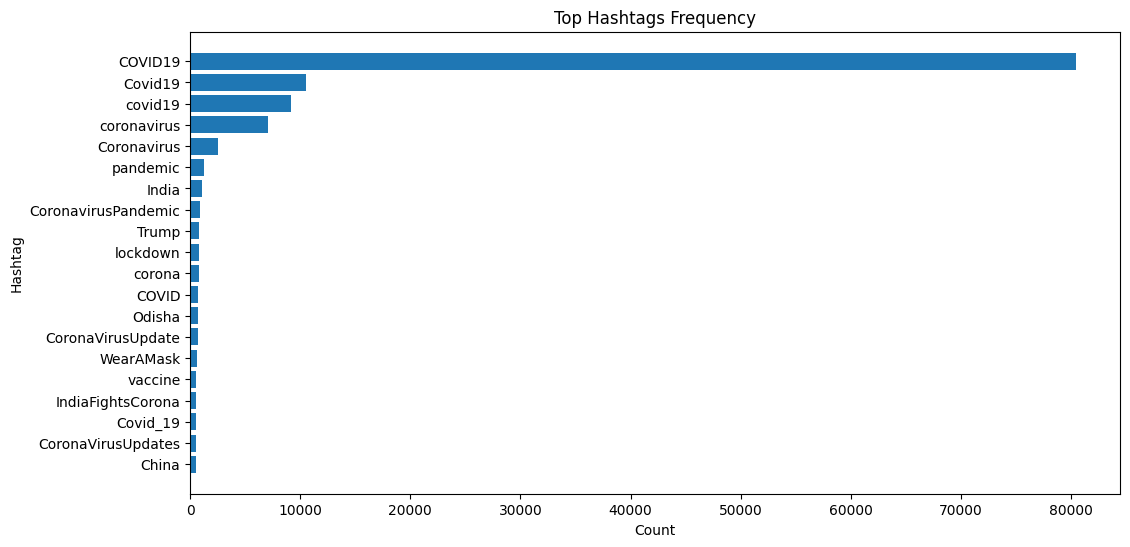

In [19]:
import matplotlib.pyplot as plt

# Ensure 'Hashtag' column is of type string and drop any NaN values
hashtag_df = hashtag_df.dropna().astype({"Hashtag": str})

# Select the top N hashtags for visualization
top_n = 20
top_hashtags = hashtag_df.head(top_n)

# Plot horizontal bar chart
plt.figure(figsize=(12, 6))
plt.barh(top_hashtags['Hashtag'][::-1], top_hashtags['Count'][::-1])
plt.xlabel("Count")
plt.ylabel("Hashtag")
plt.title("Top Hashtags Frequency")
plt.show()


In [20]:
from wordcloud import WordCloud

# Ensure the dictionary keys are strings
hashtag_counts_str = {str(k): v for k, v in hashtag_counts.items() if isinstance(k, str)}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(hashtag_counts_str)


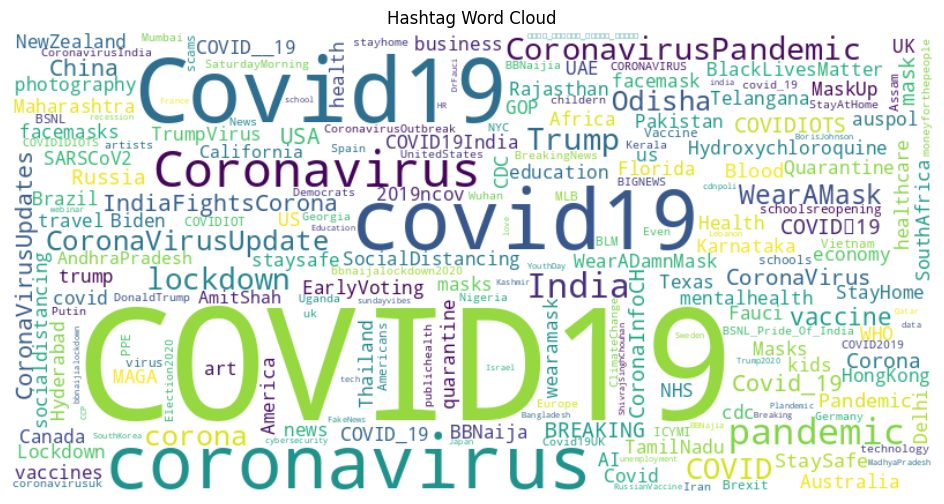

In [21]:
# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Hashtag Word Cloud")
plt.show()

In [22]:
import itertools
import networkx as nx

In [23]:
hashtag_pairs = []

for tags in df_pr['hashtags']:
    if isinstance(tags, str) and tags.startswith("["):
        tags_list = eval(tags)
        if len(tags_list) > 1:
            hashtag_pairs.extend(itertools.combinations(tags_list, 2))


In [24]:
cooccurrence_counts = Counter(hashtag_pairs)

# Create a graph from co-occurrence data
G = nx.Graph()

# Add edges with weights
for (tag1, tag2), count in cooccurrence_counts.items():
    G.add_edge(tag1, tag2, weight=count)


In [25]:
# Draw the graph (showing only the top co-occurring hashtags for better visualization)
top_n = 30  
edges_sorted = sorted(cooccurrence_counts.items(), key=lambda x: x[1], reverse=True)[:top_n]


In [26]:
G_top = nx.Graph()
for (tag1, tag2), count in edges_sorted:
    G_top.add_edge(tag1, tag2, weight=count)


/Users/apple/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


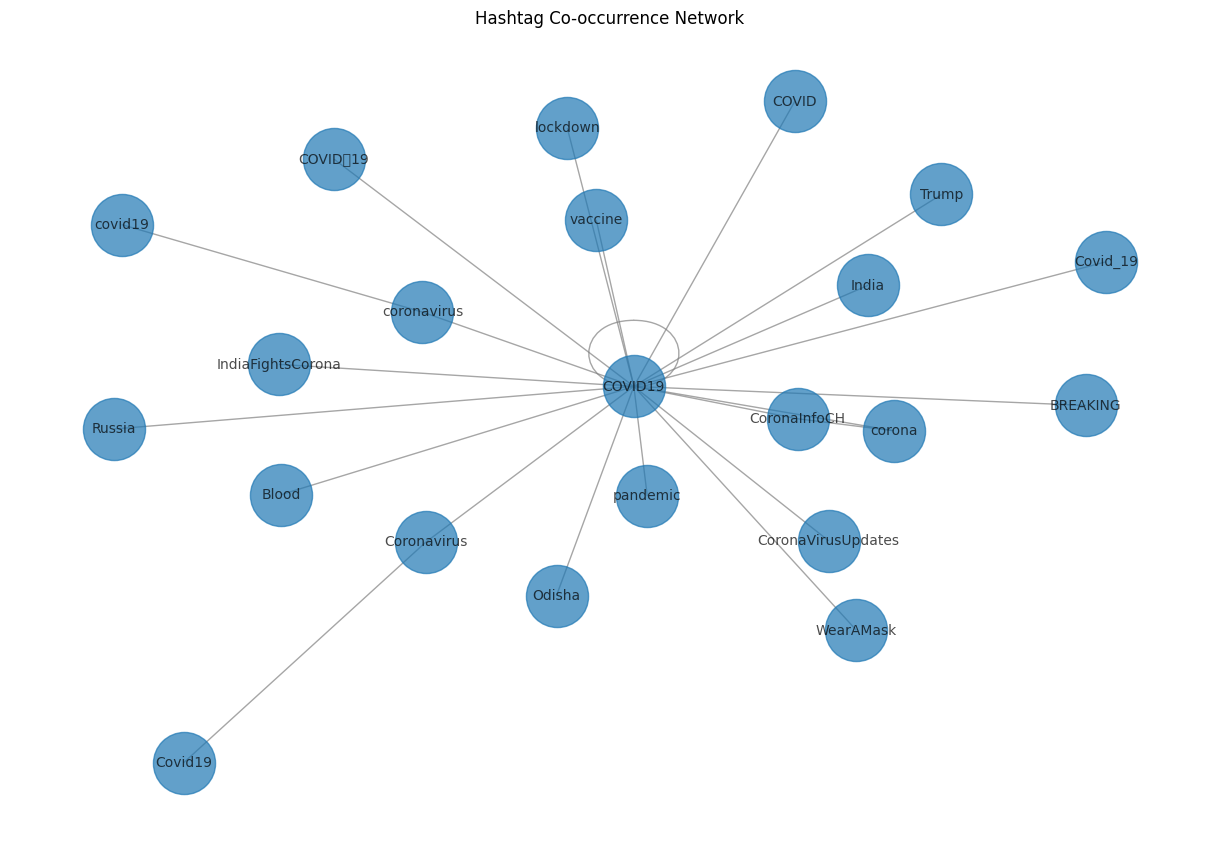

In [27]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_top, seed=42)  # Position nodes using a force-directed layout
nx.draw(G_top, pos, with_labels=True, node_size=2000, font_size=10, edge_color="gray", alpha=0.7)
plt.title("Hashtag Co-occurrence Network")
plt.show()

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [29]:
df_cleaned = df_pr.dropna(subset=["cleaned_text"])

# Reduce dataset size by sampling tweets for efficiency
sample_size = 5000  
df_sampled = df_cleaned.sample(n=min(sample_size, len(df_cleaned)), random_state=42)

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(stop_words="english", max_features=3000)  # Limited vocabulary for performance
tfidf_matrix = vectorizer.fit_transform(df_sampled["cleaned_text"])

# Apply LDA for topic modeling
num_topics = 10
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_matrix = lda_model.fit_transform(tfidf_matrix)

# Function to extract top words for each topic
def get_top_words(model, feature_names, n_words=10):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_words - 1:-1]]
        topics[f"Topic {topic_idx+1}"] = top_words
    return topics

# Get topic words
feature_names = vectorizer.get_feature_names_out()
topic_words = get_top_words(lda_model, feature_names)

# Convert topic words into DataFrame for better visualization
topic_df = pd.DataFrame.from_dict(topic_words, orient="index", columns=[f"Word {i+1}" for i in range(10)])

In [30]:
print(topic_df.head())

          Word 1       Word 2       Word 3  Word 4       Word 5       Word 6  \
Topic 1  covid19  coronavirus         news   right        great      vaccine   
Topic 2    cases      covid19          new  deaths        total        india   
Topic 3  covid19        covid  coronavirus    stay      updates         safe   
Topic 4  covid19          amp       health   fight       people  coronavirus   
Topic 5  covid19      vaccine         mask    dead  coronavirus       russia   

           Word 7     Word 8       Word 9    Word 10  
Topic 1      case  education         good        man  
Topic 2  reported   positive  coronavirus  confirmed  
Topic 3  positive     impact     pandemic       cure  
Topic 4    family   vaccines        think     school  
Topic 5      real       data     negative       test  


In [31]:
import matplotlib.colors as mcolors
topic_colors = list(mcolors.TABLEAU_COLORS.values())


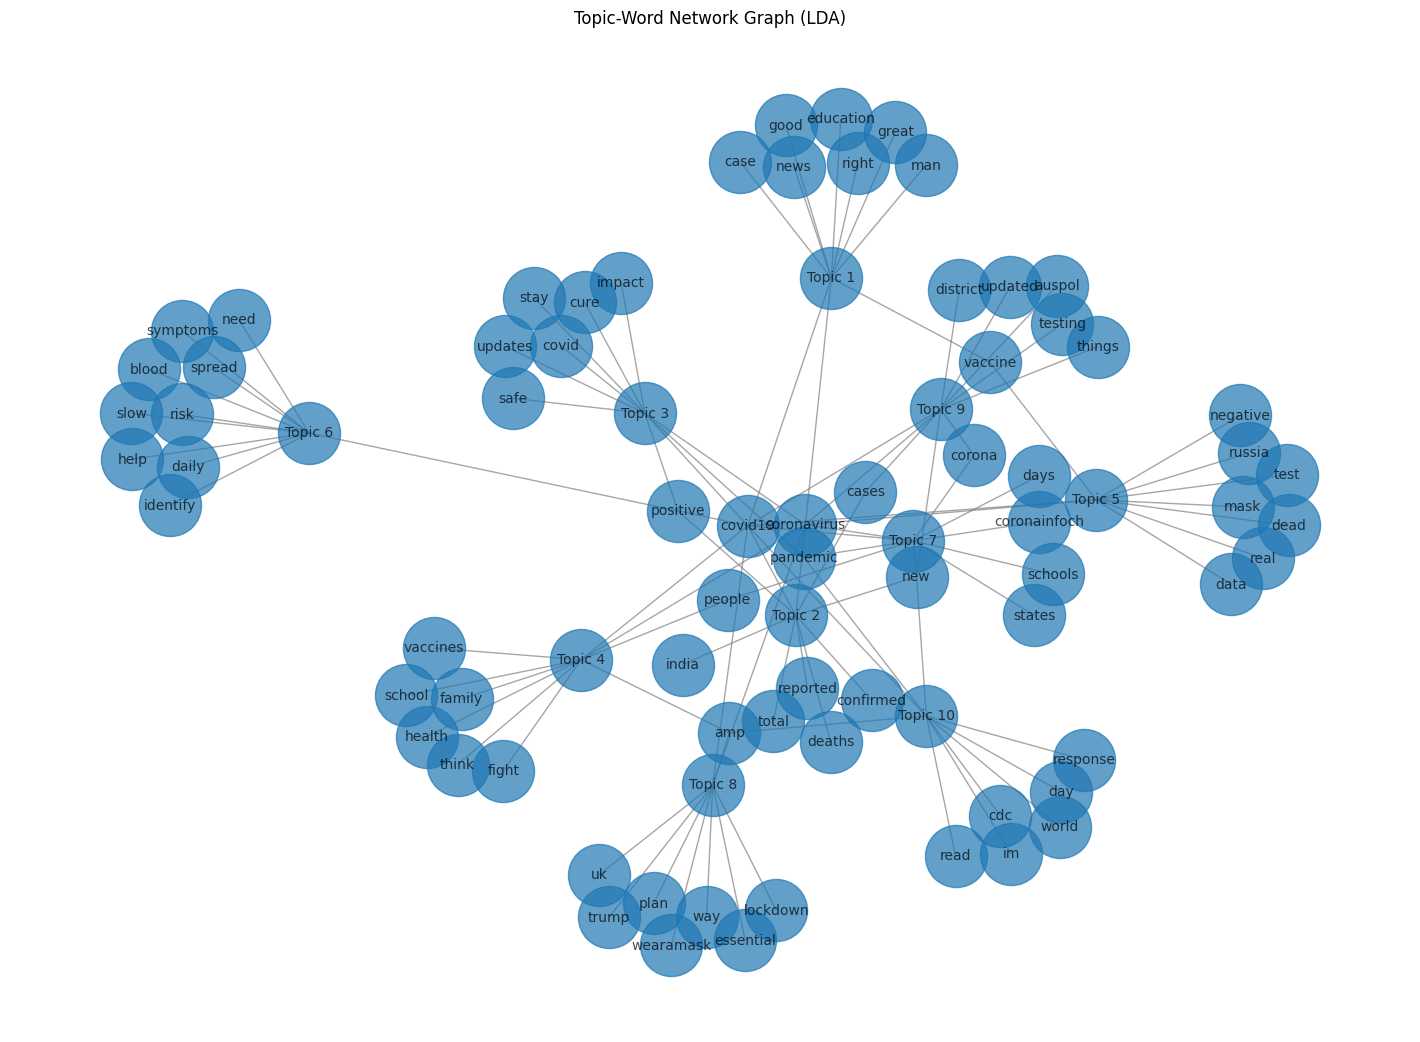

In [32]:
G = nx.Graph()
# Add edges between topics and words
for topic, words in topic_words.items():
    for word in words:
        G.add_edge(topic, word)

# Plot the network graph
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_size=2000, font_size=10, edge_color="gray", alpha=0.7)
plt.title("Topic-Word Network Graph (LDA)")
plt.show()


In [33]:
# Define specific colors for 10 topics
custom_topic_colors = {
    "Topic 1": "blue",
    "Topic 2": "orange",
    "Topic 3": "green",
    "Topic 4": "red",
    "Topic 5": "purple",
    "Topic 6": "brown",
    "Topic 7": "pink",
    "Topic 8": "cyan",
    "Topic 9": "yellow",
    "Topic 10": "magenta"
}

# Update LDA model for 10 topics
num_topics = 10  # Increase number of topics
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_matrix = lda_model.fit_transform(tfidf_matrix)

# Extract new topic words
feature_names = vectorizer.get_feature_names_out()
topic_words = get_top_words(lda_model, feature_names)


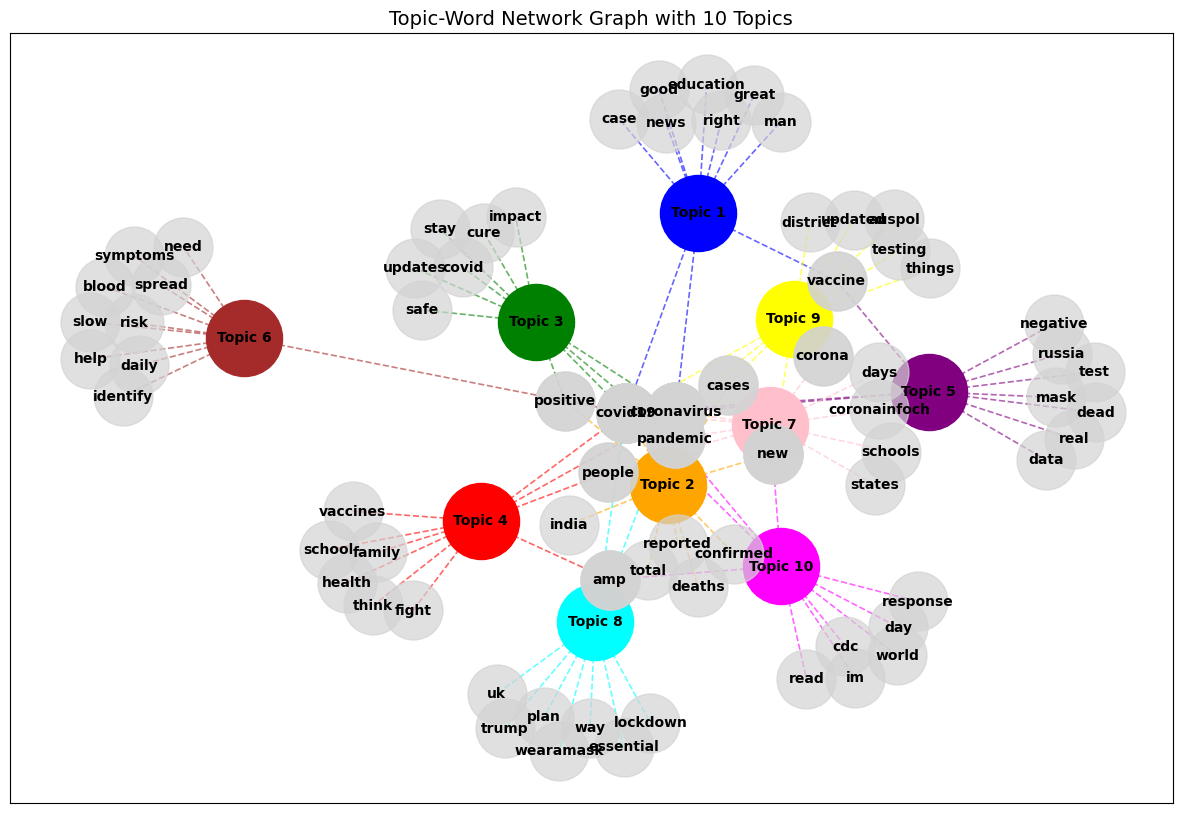

In [34]:
# Create a network graph for 10 topics
G = nx.Graph()

# Add edges between topics and words
for topic, words in topic_words.items():
    for word in words:
        G.add_edge(topic, word)

# Plot the network graph with specified colors for 10 topics
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, seed=42)  # Layout for better visualization

# Draw topic nodes with predefined colors
for topic, words in topic_words.items():
    nx.draw_networkx_nodes(G, pos, nodelist=[topic], node_color=custom_topic_colors.get(topic, "gray"), node_size=3000)

# Draw word nodes in gray
nx.draw_networkx_nodes(G, pos, nodelist=[word for words in topic_words.values() for word in words],
                       node_color="lightgray", node_size=1800, alpha=0.7)

# Draw edges with topic-specific colors
for topic, words in topic_words.items():
    nx.draw_networkx_edges(G, pos, edgelist=[(topic, word) for word in words],
                           edge_color=custom_topic_colors.get(topic, "gray"), alpha=0.6, width=1.2, style="dashed")

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black", font_weight="bold")

plt.title("Topic-Word Network Graph with 10 Topics", fontsize=14)
plt.show()


In [35]:
import re

# Extract user mentions from tweets
mention_pairs = []

for index, row in df.iterrows():
    if isinstance(row['text'], str):
        mentions = re.findall(r"@\w+", row['text'])  # Find all @mentions
        if len(mentions) > 1:
            for i in range(1, len(mentions)):
                mention_pairs.append((mentions[0], mentions[i]))  # First mention is the sender


In [36]:
#Create a directed graph for mentions
G_mentions = nx.DiGraph()

# Add edges (who mentions whom)
G_mentions.add_edges_from(mention_pairs)

# Visualize the user mention network (showing only the top 30 most connected users for clarity)
top_users = [node for node, degree in sorted(G_mentions.degree, key=lambda x: x[1], reverse=True)[:30]]
subgraph = G_mentions.subgraph(top_users)

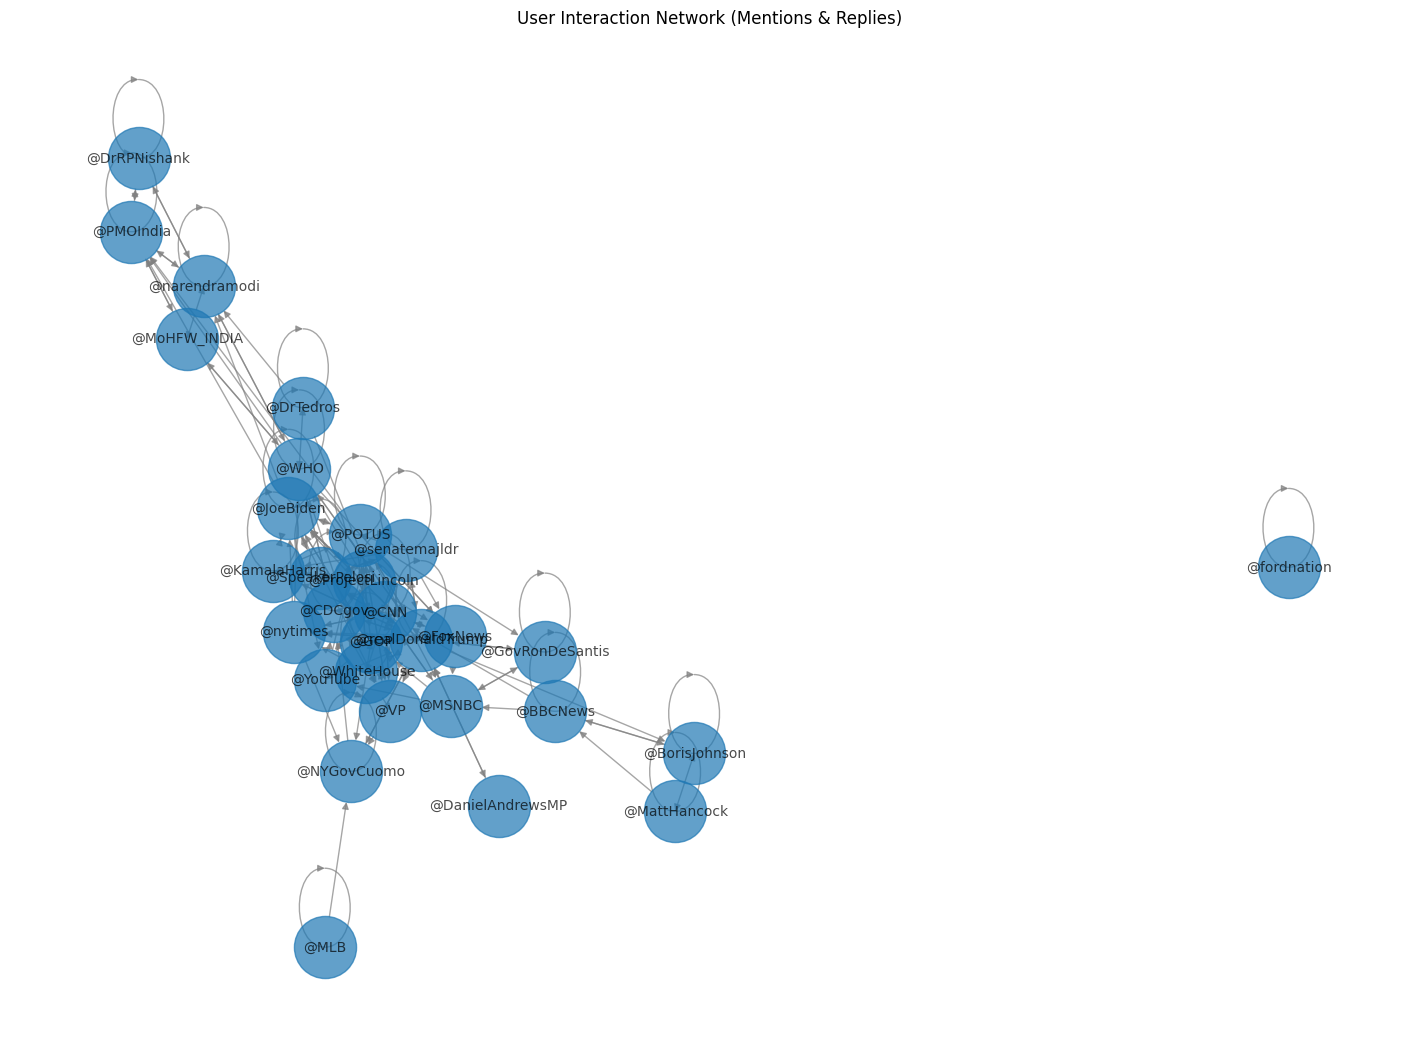

In [37]:
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(subgraph, seed=42)  # Positioning of nodes
nx.draw(subgraph, pos, with_labels=True, node_size=2000, font_size=10, edge_color="gray", alpha=0.7, arrows=True)
plt.title("User Interaction Network (Mentions & Replies)")
plt.show()

In [38]:
degree_centrality = nx.degree_centrality(G_mentions)

# Compute PageRank (importance of users based on network structure)
pagerank_scores = nx.pagerank(G_mentions)

# Convert results into DataFrames
influencers_df = pd.DataFrame({
    "User": list(degree_centrality.keys()),
    "Degree Centrality": list(degree_centrality.values()),
    "PageRank": [pagerank_scores[user] for user in degree_centrality.keys()]
})

# Sort by PageRank to find top influencers
influencers_df = influencers_df.sort_values(by="PageRank", ascending=False)


In [39]:
print(influencers_df.head(10))

                 User  Degree Centrality  PageRank
5    @realDonaldTrump           0.036753  0.011418
479         @JoeBiden           0.007140  0.002312
85               @GOP           0.007065  0.002210
133              @WHO           0.009583  0.002168
177            @POTUS           0.006050  0.001734
115     @BorisJohnson           0.005787  0.001623
135              @CNN           0.006877  0.001515
237           @CDCgov           0.003533  0.001141
101     @narendramodi           0.003833  0.001115
871       @NYGovCuomo           0.003645  0.001080


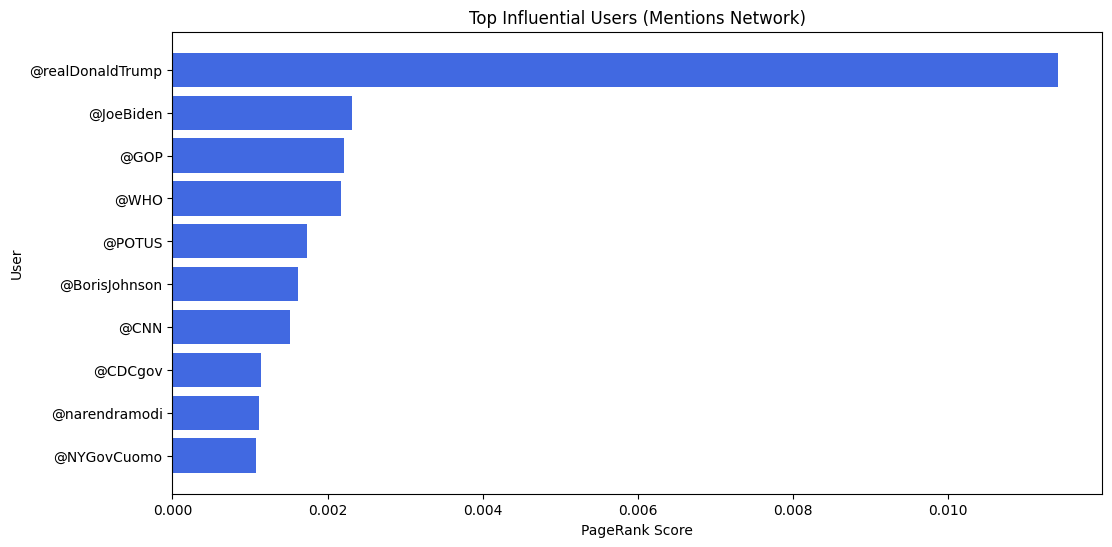

In [40]:
import matplotlib.pyplot as plt

top_n = 10  # Number of top users to display
top_influencers = influencers_df.head(top_n)

plt.figure(figsize=(12, 6))
plt.barh(top_influencers["User"][::-1], top_influencers["PageRank"][::-1], color="royalblue")
plt.xlabel("PageRank Score")
plt.ylabel("User")
plt.title("Top Influential Users (Mentions Network)")
plt.show()

In [41]:
# Bot Detection: Identifying potential bot accounts
# Define bot-like behavior indicators
df_pr['user_followers'] = pd.to_numeric(df_pr['user_followers'], errors='coerce')
df_pr['user_friends'] = pd.to_numeric(df_pr['user_friends'], errors='coerce')
df_pr['user_favourites'] = pd.to_numeric(df_pr['user_favourites'], errors='coerce')


In [42]:
# Compute bot-related metrics
df_pr['followers_to_friends_ratio'] = df_pr['user_followers'] / (df_pr['user_friends'] + 1)  # Avoid division by zero
df_pr['low_followers'] = df_pr['user_followers'] < 50  # Very low follower count
df_pr['high_following'] = df_pr['user_friends'] > 5000  # Following too many accounts
df_pr['low_favorites'] = df_pr['user_favourites'] < 10  # Very few liked tweets
df_pr['recent_account'] = pd.to_datetime(df_pr['user_created'], errors='coerce') > '2020-01-01'  # New accounts

In [43]:
df_pr['potential_bot'] = (df_pr['low_followers'] & df_pr['high_following']) | df_pr['low_favorites'] | df_pr['recent_account']
bot_counts = df_pr['potential_bot'].value_counts(normalize=True) * 100


In [44]:
print(df_pr[['user_name', 'user_followers', 'user_friends', 'user_favourites', 'potential_bot']].head(10))

                             user_name  user_followers  user_friends  \
2                      Time4fisticuffs            9275          9525   
3                          ethel mertz             197           987   
4                             DIPR-J&K          101009           168   
5                     🎹 Franz Schubert            1180          1071   
6                         hr bartender           79956         54810   
9    Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺           55201         34239   
11                         Creativegms             241          1694   
12                          SEXXYLYPPS               0             8   
13  Africa Youth Advisory Board on DRR             830           254   
15                       Dimapur 24/7.             274            32   

    user_favourites  potential_bot  
2            7254.0          False  
3            1488.0          False  
4             101.0          False  
5            1287.0          False  
6            3801.0   

In [45]:
df_pr[['user_name', 'user_followers', 'user_friends', 'user_favourites', 'potential_bot']].to_csv("potential_bot_accounts.csv", index=False)
print("Potential bot accounts saved as 'potential_bot_accounts.csv'.")

Potential bot accounts saved as 'potential_bot_accounts.csv'.


In [46]:
if 'potential_bot' not in df_pr.columns:
    print("Error: 'potential_bot' column not found. Recalculating bot detection...")


In [47]:
df_pr['user_followers'] = pd.to_numeric(df_pr['user_followers'], errors='coerce')
df_pr['user_friends'] = pd.to_numeric(df_pr['user_friends'], errors='coerce')
df_pr['user_favourites'] = pd.to_numeric(df_pr['user_favourites'], errors='coerce')
df_pr['followers_to_friends_ratio'] = df_pr['user_followers'] / (df_pr['user_friends'] + 1)
df_pr['low_followers'] = df_pr['user_followers'] < 50  
df_pr['high_following'] = df_pr['user_friends'] > 5000  
df_pr['low_favorites'] = df_pr['user_favourites'] < 10  
df_pr['recent_account'] = pd.to_datetime(df_pr['user_created'], errors='coerce') > '2020-01-01'  

df_pr['potential_bot'] = (df_pr['low_followers'] & df_pr['high_following']) | df_pr['low_favorites'] | df_pr['recent_account']


In [48]:
# Re-run bot percentage calculation
bot_counts = df_pr['potential_bot'].value_counts()


In [49]:
bot_counts

potential_bot
False    87614
True     11461
Name: count, dtype: int64

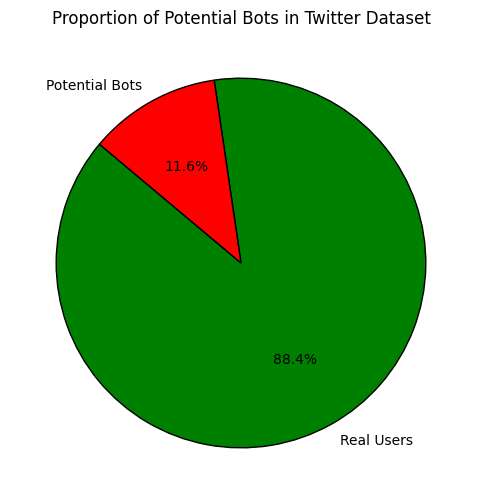

In [51]:
import matplotlib.pyplot as plt

labels = ['Real Users', 'Potential Bots']
colors = ['green', 'red']
plt.figure(figsize=(6, 6))
plt.pie(bot_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Proportion of Potential Bots in Twitter Dataset")
plt.show()

In [54]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

df_pr["retweet_count"] = pd.to_numeric(df_pr["retweet_count"], errors='coerce').fillna(0) if "retweet_count" in df_pr.columns else 0
df_pr["likes_count"] = pd.to_numeric(df_pr["user_favourites"], errors='coerce').fillna(0) if "user_favourites" in df_pr.columns else 0
df_pr["user_followers"] = pd.to_numeric(df_pr["user_followers"], errors='coerce').fillna(0) if "user_followers" in df_pr.columns else 0


In [56]:
print("Existing columns in DataFrame:", df_pr.columns)


Existing columns in DataFrame: Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet', 'cleaned_text',
       'lemmatized_text', 'sentiment', 'sentiment_label',
       'followers_to_friends_ratio', 'low_followers', 'high_following',
       'low_favorites', 'recent_account', 'potential_bot', 'retweet_count',
       'likes_count'],
      dtype='object')


In [ ]:
df_pr["tweet_length"] = df_pr["cleaned_text"].apply(lambda x: len(str(x)) if isinstance(x, str) else 0)

# Compute word count
df_pr["word_count"] = df_pr["cleaned_text"].apply(lambda x: len(str(x).split()) if isinstance(x, str) else 0)

#Compute sentiment score using TextBlob
from textblob import TextBlob
df_pr["sentiment_score"] = df_pr["lemmatized_text"].apply(lambda x: TextBlob(str(x)).sentiment.polarity if isinstance(x, str) else 0)


In [61]:
# Ensure 'hashtags' column in df_pr is treated as a string and handle missing values properly
df_pr['hashtags'] = df_pr['hashtags'].astype(str).fillna("[]") 

# Convert string representation of lists into actual lists
df_pr['hashtags'] = df_pr['hashtags'].apply(lambda x: eval(x) if isinstance(x, str) and x.startswith("[") else [])

# Count hashtag frequencies properly
hashtag_counts = Counter(tag for tags in df_pr['hashtags'] if isinstance(tags, list) for tag in tags)

# Convert to DataFrame
hashtag_df = pd.DataFrame(hashtag_counts.items(), columns=['Hashtag', 'Count'])

# Define popularity threshold (top 10% most used hashtags as 'popular')
hashtag_threshold = hashtag_df["Count"].quantile(0.90)
hashtag_df["Popular"] = (hashtag_df["Count"] >= hashtag_threshold).astype(int)

# Create a set of popular hashtags for faster lookup
popular_hashtags = set(hashtag_df[hashtag_df["Popular"] == 1]["Hashtag"].values)

# Label tweets based on whether they contain popular hashtags
df_pr["Hashtag_Popular"] = df_pr["hashtags"].apply(lambda tags: 1 if isinstance(tags, list) and any(tag in popular_hashtags for tag in tags) else 0)

# Verify the new column exists
print(df_pr[['hashtags', 'Hashtag_Popular']].head())


                        hashtags  Hashtag_Popular
2                      [COVID19]                1
3                      [COVID19]                1
4  [CoronaVirusUpdates, COVID19]                1
5         [coronavirus, covid19]                1
6          [COVID19, Recruiting]                1


In [62]:
X = df_pr[["tweet_length", "word_count", "sentiment_score"]]
y = df_pr["Hashtag_Popular"]


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [66]:
# Perform cross-validation to assess model performance
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring="accuracy")

In [68]:
cv_scores

array([0.93679031, 0.93666414, 0.93672723, 0.93672723, 0.93672723])

In [ ]:
y_pred = xgb_model.predict(X_test)

In [72]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [73]:
print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

Model Accuracy: 0.9377
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1235
           1       0.94      1.00      0.97     18580

    accuracy                           0.94     19815
   macro avg       0.47      0.50      0.48     19815
weighted avg       0.88      0.94      0.91     19815



In [74]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [76]:
# Compute missing features if not already present
df_pr["tweet_length"] = df_pr["cleaned_text"].apply(lambda x: len(str(x)) if isinstance(x, str) else 0)
df_pr["word_count"] = df_pr["cleaned_text"].apply(lambda x: len(str(x).split()) if isinstance(x, str) else 0)

# Sentiment score using TextBlob
from textblob import TextBlob
df_pr["sentiment_score"] = df_pr["lemmatized_text"].apply(lambda x: TextBlob(str(x)).sentiment.polarity if isinstance(x, str) else 0)

# Ensure numeric conversion for engagement features
df_pr["retweet_count"] = pd.to_numeric(df_pr["retweet_count"], errors='coerce').fillna(0)
df_pr["likes_count"] = pd.to_numeric(df_pr["user_favourites"], errors='coerce').fillna(0)
df_pr["user_followers"] = pd.to_numeric(df_pr["user_followers"], errors='coerce').fillna(0)


In [77]:
from sklearn.ensemble import RandomForestClassifier

# Define features and target
X = df_pr[["tweet_length", "word_count", "sentiment_score", "retweet_count", "likes_count", "user_followers"]]
y = df_pr["Hashtag_Popular"]  # Ensure this column exists

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


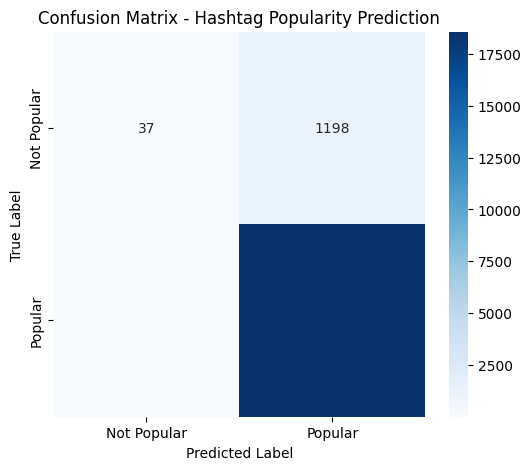

In [79]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Popular", "Popular"], yticklabels=["Not Popular", "Popular"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Hashtag Popularity Prediction")
plt.show()


In [80]:
# Ensure necessary columns exist before creating new features
df_pr["retweet_count"] = pd.to_numeric(df_pr.get("retweet_count", 0), errors='coerce').fillna(0)
df_pr["likes_count"] = pd.to_numeric(df_pr.get("user_favourites", 0), errors='coerce').fillna(0)
df_pr["user_followers"] = pd.to_numeric(df_pr.get("user_followers", 0), errors='coerce').fillna(0)
df_pr["user_friends"] = pd.to_numeric(df_pr.get("user_friends", 0), errors='coerce').fillna(0)

#  User Engagement Features
df_pr["retweet_ratio"] = df_pr["retweet_count"] / (df_pr["retweet_count"] + df_pr["likes_count"] + 1)
df_pr["followers_to_friends_ratio"] = df_pr["user_followers"] / (df_pr["user_friends"] + 1)

# Ensure hashtags column is properly formatted
df_pr["hashtags"] = df_pr["hashtags"].astype(str).apply(lambda x: eval(x) if x.startswith("[") else [])
df_pr["hashtag_count"] = df_pr["hashtags"].apply(lambda x: len(x) if isinstance(x, list) else 0)

#  Text Complexity Features
df_pr["avg_word_length"] = df_pr["cleaned_text"].apply(lambda x: sum(len(word) for word in str(x).split()) / len(str(x).split()) if isinstance(x, str) and len(str(x).split()) > 0 else 0)

# 3️⃣ Temporal Features
df_pr["date"] = pd.to_datetime(df_pr["date"], errors="coerce")
df_pr["hour_of_day"] = df_pr["date"].dt.hour
df_pr["day_of_week"] = df_pr["date"].dt.dayofweek
df_pr["is_peak_hours"] = df_pr["hour_of_day"].apply(lambda x: 1 if 8 <= x <= 22 else 0)


In [81]:
print(df_pr.head())

          user_name         user_location  \
2   Time4fisticuffs      Pewee Valley, KY   
3       ethel mertz  Stuck in the Middle    
4          DIPR-J&K     Jammu and Kashmir   
5  🎹 Franz Schubert           Новоро́ссия   
6      hr bartender       Gainesville, FL   

                                    user_description         user_created  \
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4  🖊️Official Twitter handle of Department of Inf...  2017-02-12 06:45:15   
5  🎼  #Новоро́ссия #Novorossiya #оставайсядома #S...  2018-03-19 16:29:52   
6  Workplace tips and advice served up in a frien...  2008-08-12 18:19:49   

   user_followers  user_friends  user_favourites user_verified  \
2            9275          9525           7254.0         False   
3             197           987           1488.0         False   
4          101009           168            101.0         False   
5 

In [82]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7, 10],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

# Perform Randomized Search CV for faster tuning
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_grid, n_iter=20, scoring="accuracy", cv=3, verbose=2, random_state=42, n_jobs=-1
)

In [83]:
# Prepare features and target for training
X = df_pr[["tweet_length", "word_count", "sentiment_score", "retweet_ratio", "followers_to_friends_ratio", "hashtag_count", "avg_word_length", "hour_of_day", "day_of_week", "is_peak_hours"]]
y = df_pr["Hashtag_Popular"]

# Split data for model tuning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Randomized Search to the data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
best_score = random_search.best_score_

# Display best parameters and score
print("Best Parameters:", best_params)
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=50, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=50, subsample=0.8; total time=   1.2s
[CV] END colsample_

In [84]:
print(df_pr.columns)  # Check available columns
print(df_pr[["Hashtag_Popular"]].head())  # Ensure target column exists


Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet', 'cleaned_text',
       'lemmatized_text', 'sentiment', 'sentiment_label',
       'followers_to_friends_ratio', 'low_followers', 'high_following',
       'low_favorites', 'recent_account', 'potential_bot', 'retweet_count',
       'likes_count', 'tweet_length', 'word_count', 'sentiment_score',
       'Hashtag_Popular', 'retweet_ratio', 'hashtag_count', 'avg_word_length',
       'hour_of_day', 'day_of_week', 'is_peak_hours'],
      dtype='object')
   Hashtag_Popular
2                1
3                1
4                1
5                1
6                1


In [ ]:
df_sampled = df_pr.sample(n=10000, random_state=42)  # Reduce dataset size for efficiency
X = df_sampled[["tweet_length", "word_count", "sentiment_score", "retweet_ratio", "followers_to_friends_ratio", "hashtag_count", "avg_word_length", "hour_of_day", "day_of_week", "is_peak_hours"]]
y = df_sampled["Hashtag_Popular"]